<a href="https://colab.research.google.com/github/Sanjeevikumar-M/Internship-at-SCT/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/train.csv')

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [79]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(duplicates)

0


In [80]:
# Handle missing values:
# For example, we might fill missing Age values with the median and drop rows where 'Embarked' is missing.
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.dropna(subset=['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [81]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [82]:
# Verify data types (convert 'Survived', 'Pclass', etc., to appropriate types if needed)
df['Survived'] = df['Survived'].astype('int')
df['Pclass'] = df['Pclass'].astype('category')

In [83]:
# Summary of cleaned data
cleaned_info = df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    object  
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        202 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 84.3+ KB


In [84]:
# To print the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

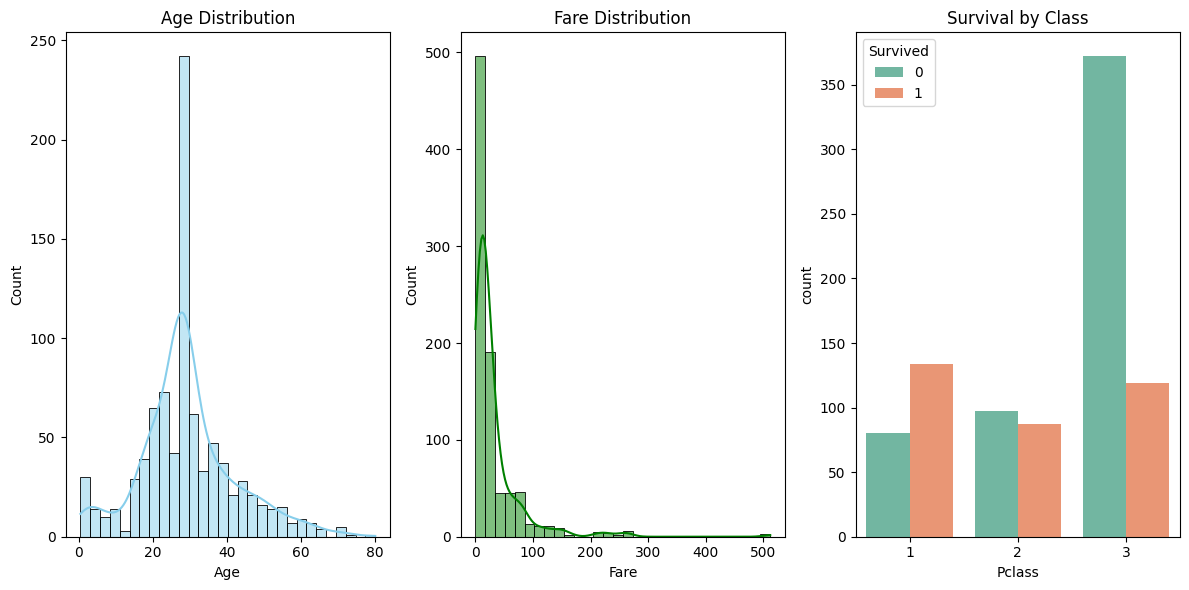

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
summary_statistics = df.describe()

# Visualize the distribution of key variables
plt.figure(figsize=(12, 6))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')

# Fare distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Fare'], bins=30, kde=True, color='green')
plt.title('Fare Distribution')

# Survived vs. Pclass (categorical vs. numerical)
plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival by Class')

plt.tight_layout()
plt.show()

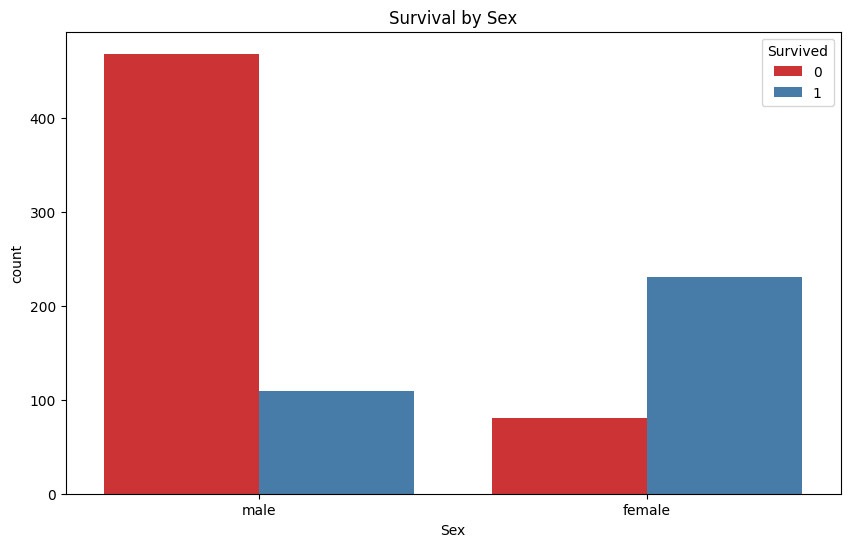

In [86]:
# Relationship between 'Survived' and other categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Sex')
plt.show()

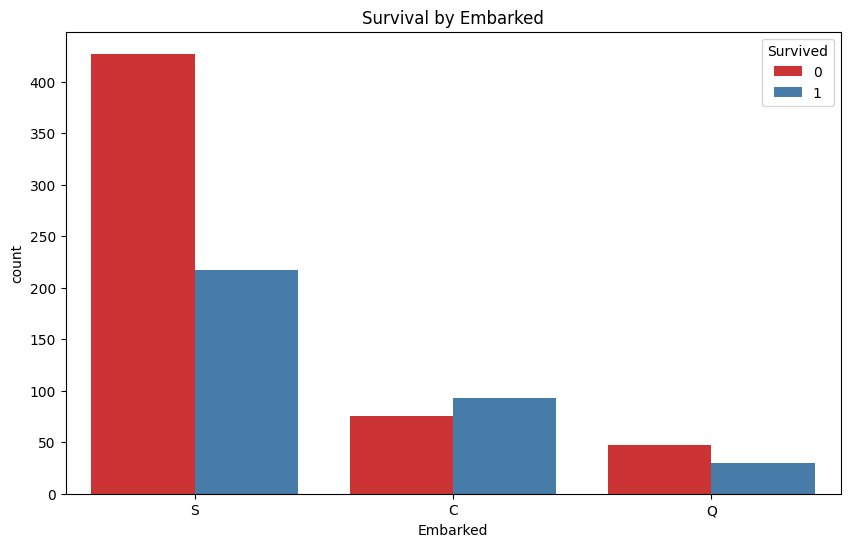

In [87]:
# Relationship between 'Survived' and other categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.title('Survival by Embarked')
plt.show()

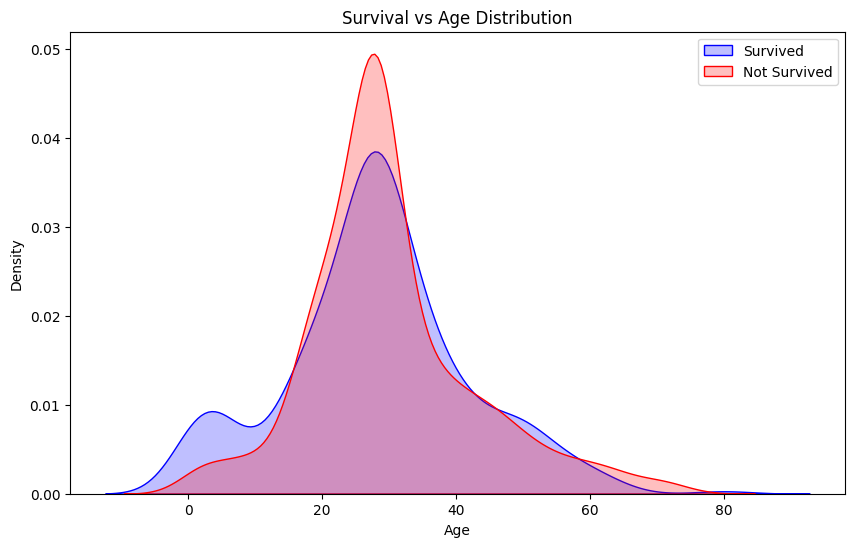

In [88]:
# KDE plot for Survival vs Age Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'], fill=True, color='blue', label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], fill=True, color='red', label='Not Survived')
plt.title('Survival vs Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

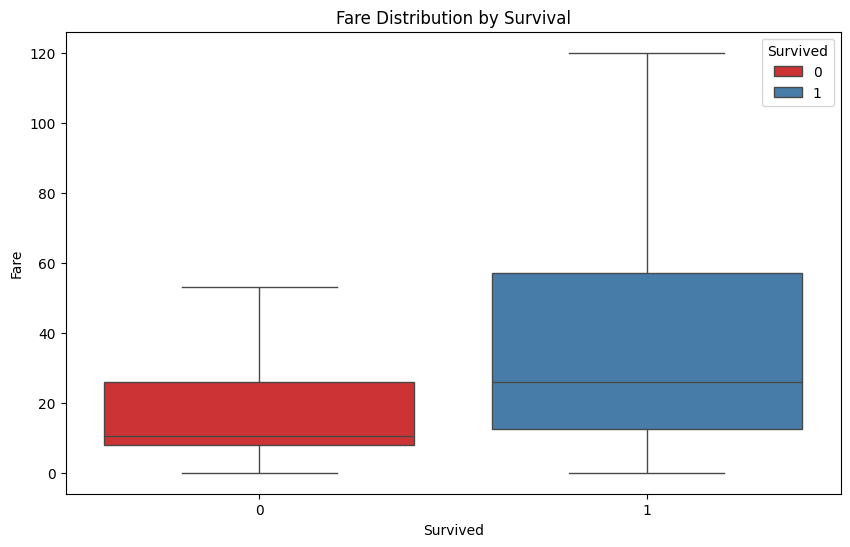

In [89]:
# Fare distribution by Survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df, hue='Survived', palette='Set1', showfliers=False)
plt.title('Fare Distribution by Survival')
plt.show()

<ipython-input-90-31ac16aca6c7>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_heatmap = df.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean')


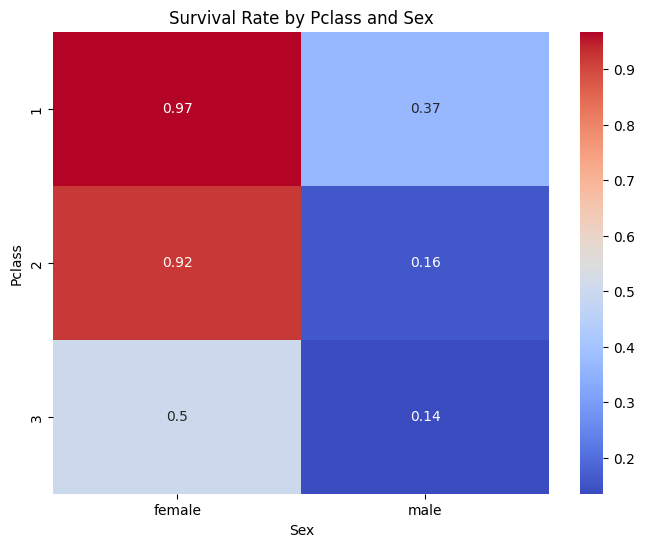

In [90]:
# Heatmap of survival rate by combinations of features
survival_heatmap = df.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(survival_heatmap, annot=True, cmap='coolwarm')
plt.title('Survival Rate by Pclass and Sex')
plt.show()

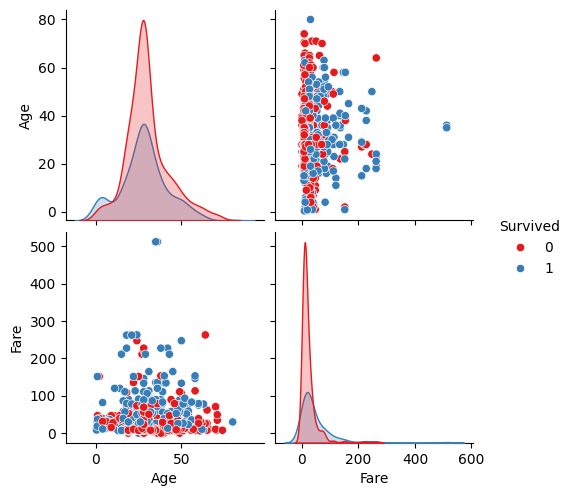

In [91]:
# pairplot comparing Age and Fare
subset = df[['Age', 'Fare', 'Survived']]
sns.pairplot(subset, hue='Survived', palette='Set1')
plt.show()